# Formative 4

In [1]:
import pickle
from string import punctuation

import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
import numpy as np

In [2]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

In [3]:
# Define function to clean text
def clean(text):
    return [w.strip(punctuation) for w in text.strip().split() if w.strip(punctuation) != '']

In [4]:
# Load data
data = pd.read_csv('formative4_data/arxiv_data.csv', encoding='utf-8')

In [5]:
# Load fastText embeddings
with open('formative4_data/fasttext_vectors.p', 'rb') as f:
    fasttext_vecs = pickle.load(f)

In [6]:
# Clean abstracts
data['cleaned'] = data.abstract.apply(clean)

In [7]:
# Define list of labels
labels = ['ap-2010', 'ap-2020', 'cs-2010', 'cs-2020']

# Define dictionary for label look-up
label2id = {'ap-2010': 0, 'ap-2020': 1, 'cs-2010': 2, 'cs-2020': 3}

# Define dictionary for reverse label look-up
id2label = {v: k for k, v in label2id.items()}

# Convert labels
data['label'] = data.label.apply(lambda x: label2id[x])

In [8]:
# Split data into training, development, and test sets
train, dev_test = train_test_split(data, test_size=0.2, stratify=data['label'], random_state=0)
dev, test = train_test_split(dev_test, test_size=0.5, stratify=dev_test['label'], random_state=0)

### Part I: Describing the Dataset

**A) Create counters containing word frequencies for the four classes. Compare the 30 most frequent words for each class. What do you observe?**

In [9]:
train = train.copy() # Set copy of a dataframe

In [10]:
def get_emb(train):
    train['cleaned_no_stop'] = train.cleaned.map(lambda sentence: [word for word in sentence if word not in stopWords])
    train['embedding'] = train.cleaned_no_stop.map(lambda sentence: np.mean([fasttext_vecs[word] for word in sentence], axis = 0))
    return train

In [11]:
dev = dev.copy()
test = test.copy()

In [12]:
dev = get_emb(dev)
test = get_emb(test)

In [13]:
train['cleaned_no_stop'] = train.cleaned.map(lambda sentence: [word for word in sentence if word not in stopWords])

In [14]:
train['embedding'] = train.cleaned_no_stop.map(lambda sentence: np.mean([fasttext_vecs[word] for word in sentence], axis = 0))

In [15]:
def get_top30_words(column='cleaned_no_stop'):
    counters = []
    for num in range(4):

        words = [x for x in train.loc[train.label==num, column].explode() if x not in stopWords]
        top_values = Counter(words).most_common(30)
        counters.append(top_values)
    print(f"Top 30 words/bigrams based on column {column}")

    return pd.DataFrame(counters).transpose()

In [16]:
get_top30_words()

Top 30 words/bigrams based on column cleaned_no_stop


,0,1,2,3
0,"(galaxies, 1699)","(galaxies, 1930)","(paper, 1565)","(data, 1705)"
1,"(mass, 1592)","(mass, 1579)","(algorithm, 1169)","(model, 1544)"
2,"(stars, 1512)","(data, 1406)","(data, 1124)","(paper, 1233)"
3,"(emission, 1330)","(find, 1330)","(problem, 1051)","(performance, 1068)"
4,"(data, 1246)","(galaxy, 1262)","(based, 951)","(using, 1045)"
5,"(star, 1212)","(using, 1245)","(system, 930)","(network, 1040)"
6,"(observations, 1132)","(emission, 1229)","(network, 920)","(results, 1010)"
7,"(observed, 1060)","(stars, 1204)","(using, 891)","(proposed, 995)"
8,"(galaxy, 1037)","(model, 1199)","(time, 840)","(learning, 986)"
9,"(also, 1009)","(observations, 1147)","(model, 812)","(method, 981)"


Although some words overlap (such as data), the words are mostly more similar between (0,1) and (2,3) topics.

**B) Compute the pairwise Jaccard similarities for the vocabularies of all four classes and display them
in a four-by-four similarity matrix. What do you observe? Are the similarities in line with your expectations? Compare the numbers to the Jaccard similarities computed for male and female content words 
in formative 2. What do you observe?**

In [17]:
# Define function for calculating Jaccard similarity
def jaccard_sim(vocab_1, vocab_2):
    return len(vocab_1.intersection(vocab_2)) / len(vocab_1.union(vocab_2))

In [18]:
train.head()

,abstract,label,cleaned,cleaned_no_stop,embedding
7607,this paper discusses highly general mechanisms...,2,"[this, paper, discusses, highly, general, mech...","[paper, discusses, highly, general, mechanisms...","[-0.009502678, 0.024744242, 0.018143093, 0.047..."
1652,in an effort to simultaneously study the gas a...,0,"[in, an, effort, to, simultaneously, study, th...","[effort, simultaneously, study, gas, dust, com...","[-0.029642856, -0.019208875, -4.4049713e-05, 0..."
11273,"in this paper, we propose a lightweight yet ef...",3,"[in, this, paper, we, propose, a, lightweight,...","[paper, propose, lightweight, yet, effective, ...","[-0.013991732, 0.004586704, 0.01912991, 0.0380..."
983,we performed stellar population synthesis on t...,0,"[we, performed, stellar, population, synthesis...","[performed, stellar, population, synthesis, nu...","[-0.028181663, 0.0018971778, -0.006148272, 0.0..."
11436,this paper addresses the problem of text-to-vi...,3,"[this, paper, addresses, the, problem, of, tex...","[paper, addresses, problem, text-to-video, tem...","[-0.01638089, 0.018218417, 0.012453634, 0.0394..."


In [19]:
def get_jac_similarity(column='cleaned_no_stop'):
    # Get the vocabulary
    vocab = {}
    for i in range(4):
        vocab[i] = set(train.loc[train.label==i, column].explode())

    # Get the similarities
    similarities = {}
    for i in range(4):
        similarities[i] = {}
        for j in range(4):
            similarities[i][j] = jaccard_sim(vocab[i], vocab[j])
    
    print(f"Jaccard similarity based on column {column}")
    return pd.DataFrame(similarities)

In [20]:
get_jac_similarity()

Jaccard similarity based on column cleaned_no_stop


,0,1,2,3
0,1.000000,0.277331,0.167978,0.161389
1,0.277331,1.000000,0.167717,0.166304
2,0.167978,0.167717,1.000000,0.289682
3,0.161389,0.166304,0.289682,1.000000


As expected, (0 & 1) and (2 & 3) are more closely related to each other, yet, surprisingly, the Jaccard similarities are still not that large. This is perhaps because the vocabulary contains a lot of words that are numbers or other abbreviations

**C) Repeat steps A) and B) for bigrams instead of unigrams, i.e., create bigram vocabularies for the four classes, compare the 30 most frequent bigrams, and examine the pairwise Jaccard similarities. Are the observed patterns similar to what you found for unigrams?**

In [21]:
from nltk.util import ngrams
import nltk

In [22]:
sentence = train.cleaned_no_stop.iloc[0]

In [23]:
train['bigrams'] = train.cleaned_no_stop.map(lambda sentence: list(ngrams(sentence, 2)))

In [24]:
vocab = {}
for i in range(4):
    vocab[i] = set(train.loc[train.label==i, 'bigrams'].explode())

In [25]:
get_top30_words('bigrams')

Top 30 words/bigrams based on column bigrams


,0,1,2,3
0,"((star, formation), 461)","((star, formation), 461)","((paper, presents), 130)","((paper, propose), 225)"
1,"((magnetic, field), 324)","((magnetic, field), 396)","((results, show), 118)","((experimental, results), 196)"
2,"((black, hole), 225)","((stellar, mass), 252)","((ad, hoc), 107)","((results, show), 186)"
3,"((et, al), 183)","((black, hole), 245)","((paper, present), 101)","((propose, novel), 176)"
4,"((dark, matter), 175)","((dark, matter), 194)","((paper, propose), 97)","((neural, network), 171)"
5,"((magnetic, fields), 155)","((neutron, star), 149)","((experimental, results), 84)","((deep, learning), 168)"
6,"((stellar, mass), 141)","((light, curves), 146)","((sensor, networks), 84)","((proposed, method), 156)"
7,"((dark, energy), 134)","((milky, way), 145)","((hoc, networks), 73)","((neural, networks), 142)"
8,"((light, curves), 128)","((et, al), 140)","((et, al), 70)","((extensive, experiments), 127)"
9,"((emission, lines), 111)","((power, spectrum), 129)","((wireless, sensor), 67)","((machine, learning), 104)"


In [26]:
get_jac_similarity('bigrams')

Jaccard similarity based on column bigrams


,0,1,2,3
0,1.000000,0.084295,0.020268,0.020265
1,0.084295,1.000000,0.021180,0.022938
2,0.020268,0.021180,1.000000,0.054138
3,0.020265,0.022938,0.054138,1.000000


Mostly similar

**D) Now generate an embedding for each abstract by averaging the embeddings for individual words. As in subtasks A), B), and C) (and keeping in mind the results from formative 1), you should again remove stopwords for this 
analysis. Using t-SNE, reduce all abstract embeddings to two dimensions. Plot the resulting two-dimensional vectors colored by label (i.e., subject and year). What do you observe? Based on the plot, 
how would the confusion matrix for predicting the label from the average embedding probably look like?**

In [27]:
train['embedding'] = train.cleaned_no_stop.map(lambda sentence: np.mean([fasttext_vecs[word] for word in sentence], axis = 0))

In [28]:
from sklearn.manifold import TSNE


In [29]:
labels = list(train['label'])

In [30]:
tsne = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=1000, random_state=0)

In [31]:
train['embedding']

7607     [-0.009502678, 0.024744242, 0.018143093, 0.047...
1652     [-0.029642856, -0.019208875, -4.4049713e-05, 0...
11273    [-0.013991732, 0.004586704, 0.01912991, 0.0380...
983      [-0.028181663, 0.0018971778, -0.006148272, 0.0...
11436    [-0.01638089, 0.018218417, 0.012453634, 0.0394...
                               ...                        
2932     [-0.022684332, 0.042451363, -0.021151856, 0.03...
2486     [-0.027390389, 0.014490187, 0.03221822, 0.0433...
7955     [-0.016274441, 0.019715196, 0.015890574, 0.050...
1079     [-0.031163527, 0.005916177, 0.010049291, 0.036...
7907     [-0.00797397, 0.009193061, 0.007890764, 0.0448...
Name: embedding, Length: 9600, dtype: object

In [32]:
tsne_vectors = np.array(train['embedding'])

In [33]:
len(tsne_vectors)

9600

In [34]:
tsne_results = tsne.fit_transform(list(tsne_vectors))

In [35]:
import matplotlib.pyplot as plt

In [36]:
tsne_results[:, 0]

array([-31.858152,  47.695507, -29.339828, ..., -19.76898 ,  22.39162 ,
       -19.062265], dtype=float32)

In [37]:
color_code = {0: 'blue',
              1: 'red',
              2: 'green',
              3: 'yellow'}

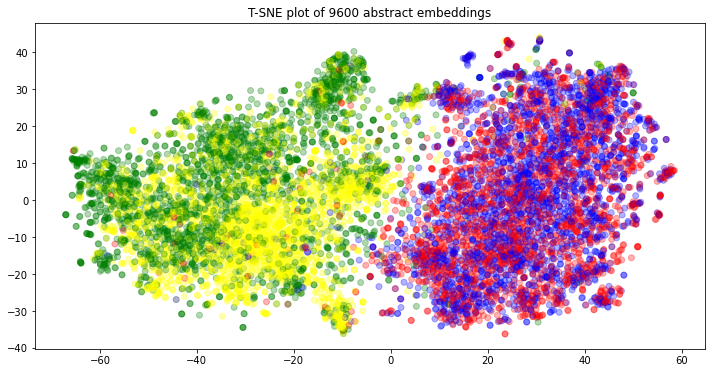

In [38]:
fig, ax = plt.subplots(1, figsize=(12,6))

ax.scatter(tsne_results[:, 0], tsne_results[:, 1], color = [color_code[x] for x in labels], alpha = 0.3)
ax.set_title(f"T-SNE plot of {len(tsne_results)} abstract embeddings");

The confusion matrix would probably have a lot of false positives between (0,1) and (1,2), and mostly correct predictions elsewhere.

In [41]:
train

,abstract,label,cleaned,cleaned_no_stop,embedding,bigrams
7607,this paper discusses highly general mechanisms...,2,"[this, paper, discusses, highly, general, mech...","[paper, discusses, highly, general, mechanisms...","[-0.009502678, 0.024744242, 0.018143093, 0.047...","[(paper, discusses), (discusses, highly), (hig..."
1652,in an effort to simultaneously study the gas a...,0,"[in, an, effort, to, simultaneously, study, th...","[effort, simultaneously, study, gas, dust, com...","[-0.029642856, -0.019208875, -4.4049713e-05, 0...","[(effort, simultaneously), (simultaneously, st..."
11273,"in this paper, we propose a lightweight yet ef...",3,"[in, this, paper, we, propose, a, lightweight,...","[paper, propose, lightweight, yet, effective, ...","[-0.013991732, 0.004586704, 0.01912991, 0.0380...","[(paper, propose), (propose, lightweight), (li..."
983,we performed stellar population synthesis on t...,0,"[we, performed, stellar, population, synthesis...","[performed, stellar, population, synthesis, nu...","[-0.028181663, 0.0018971778, -0.006148272, 0.0...","[(performed, stellar), (stellar, population), ..."
11436,this paper addresses the problem of text-to-vi...,3,"[this, paper, addresses, the, problem, of, tex...","[paper, addresses, problem, text-to-video, tem...","[-0.01638089, 0.018218417, 0.012453634, 0.0394...","[(paper, addresses), (addresses, problem), (pr..."
...,...,...,...,...,...,...
2932,we present the first observations of diffuse r...,0,"[we, present, the, first, observations, of, di...","[present, first, observations, diffuse, radiat...","[-0.022684332, 0.042451363, -0.021151856, 0.03...","[(present, first), (first, observations), (obs..."
2486,we generalize tensor-scalar theories of gravit...,0,"[we, generalize, tensor-scalar, theories, of, ...","[generalize, tensor-scalar, theories, gravitat...","[-0.027390389, 0.014490187, 0.03221822, 0.0433...","[(generalize, tensor-scalar), (tensor-scalar, ..."
7955,this paper attempts to undertake the study of ...,2,"[this, paper, attempts, to, undertake, the, st...","[paper, attempts, undertake, study, segmentati...","[-0.016274441, 0.019715196, 0.015890574, 0.050...","[(paper, attempts), (attempts, undertake), (un..."
1079,"with its excellent sensitivity, large field of...",0,"[with, its, excellent, sensitivity, large, fie...","[excellent, sensitivity, large, field, view, b...","[-0.031163527, 0.005916177, 0.010049291, 0.036...","[(excellent, sensitivity), (sensitivity, large..."


### Part II: LSTM Classifier

### New implementation

In [42]:
def create_dict(text_series, remove_stop=True):
    """Create word frequencies.
    """
    word_list = [w.strip() for text_list in text_series for w in text_list]
    vocab_dict = Counter(word_list)
    
    if remove_stop == True:
        return Counter({w: c for w, c in vocab_dict.items() if w not in stop_words})
    else:
        return Counter({w: c for w, c in vocab_dict.items()})
    
all_vocab_dict = create_dict(train["cleaned"], remove_stop=False)


In [43]:
def get_indices(all_vocab_dict):
    """Gets indices for w2id and id2d"""
    w2id = {w: i + 2 for i, w in enumerate(w for w, c in all_vocab_dict.most_common())}
    w2id['UNK'] = 1
    w2id['PAD'] = 0

    sort_key = sorted(w2id, key = lambda x: w2id[x])
    w2id = {key:w2id[key] for key in sort_key}

    id2w = {v:k for k,v in w2id.items()}
    
    return w2id, id2w

In [44]:
w2id, id2w = get_indices(all_vocab_dict)

In [45]:
class FormativeDataset(Dataset):

    def __init__(self, dataset):
        """Has information on the abstracts and labels"""
        self.abstracts = [abstract for abstract in dataset.cleaned_enc]
        self.labels = dataset.label.tolist()

    def __len__(self):
        """Has information on the dataset size"""
        return len(self.abstracts)

    def __getitem__(self, idx):
        """Returns the data"""
        abstr = self.abstracts[idx]
        label = self.labels[idx]
        return abstr, label
    
def LSTM_collate(batch):
    
    batch_size = len(batch)
    
    sents = [sent for sent, _ in batch]
    labels = torch.tensor([label for _, label in batch]).long()
    
    max_len = max(len(sent) for sent in sents)
    
    sents_pad = torch.zeros((batch_size, max_len)).long()
    
    for i, sent in enumerate(sents):
        sents_pad[i, :len(sent)] = torch.tensor(sent)
    
    return sents_pad, labels

NameError: name 'Dataset' is not defined

In [ ]:
train_data = FormativeDataset(train)
test_data = FormativeDataset(test)
dev_data = FormativeDataset(dev)

train_loader = DataLoader(train_data, batch_size=100, collate_fn=LSTM_collate, shuffle=True)
dev_loader = DataLoader(dev_data, batch_size=100, collate_fn=LSTM_collate, shuffle=True)
test_loader = DataLoader(test_data, batch_size=100, collate_fn=LSTM_collate, shuffle=True)

In [ ]:
class LSTMClassifier(nn.Module):
    
    # Pass hyperparameters as arguments
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, dropout, weights_matrix):
        
        super(LSTMClassifier, self).__init__()
        
        self.embedding = nn.Embedding.from_pretrained(embeddings=weights_matrix, freeze=True, padding_idx=0) 
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        
        emb_1 = self.dropout(self.embedding(x))
        output_lstm, (hidden, cell) = self.lstm(emb_1)
        output = self.linear(self.dropout(output_lstm[:,-1,:]))
        
        return output

In [ ]:
# Q: what happens with the UNKs? Where are the embeddings updated and where do they go?
matrix_len = len(all_vocab_dict) + 2
weights_matrix = torch.zeros((matrix_len, 300))
words_found = 0

for word_id in id2w.keys():
    if word_id in [0,1]: continue # Pass if it is "UNK" or "PAD"
    word = id2w[word_id]
    weights_matrix[word_id] = torch.tensor(fasttext_vecs[word])
    words_found += 1

In [ ]:
input_dim = 100
embedding_dim = 300
hidden_dim = 200
output_dim = 4
dropout = 0.2
device = 'cpu'

classifier = LSTMClassifier(input_dim, embedding_dim, hidden_dim, output_dim, dropout, weights_matrix)

In [46]:
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.Adam(classifier.parameters(), lr=0.01)

# Move model and data to CUDA
classifier = classifier.to(device)

NameError: name 'nn' is not defined

In [412]:
for epoch in range(1, 16):

    for i, batches in enumerate(train_loader):
        print(f"Batch {i}")

        # Get baches
        batch_x, batch_y = batches

        # Perform forward pass
        classifier.train()

        # Zero out gradients, get output and calculate loss
        optimizer.zero_grad() 
        output = classifier(batch_x)
        loss = criterion(output, batch_y)

        # Perform backpropagation
        loss.backward()

        # Update model weights
        optimizer.step()
        
        

Batch 0
tensor([[    8,    46,  1366,  ...,     0,     0,     0],
        [   13,    37,  3627,  ...,     0,     0,     0],
        [ 1195,    47,   730,  ...,     0,     0,     0],
        ...,
        [    8,   454,  2273,  ...,     0,     0,     0],
        [    5, 21020, 20355,  ...,     0,     0,     0],
        [   13,   103,  3197,  ...,     0,     0,     0]]) tensor([0, 2, 2, 0, 0, 1, 0, 1, 2, 1, 0, 3, 2, 0, 3, 2, 0, 1, 1, 0, 3, 0, 3, 3,
        3, 2, 2, 0, 3, 2, 3, 1, 0, 1, 3, 1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 2, 0, 3,
        1, 2, 1, 2, 3, 2, 1, 1, 0, 3, 0, 3, 0, 0, 0, 0, 1, 2, 2, 1, 2, 2, 0, 0,
        1, 2, 2, 3, 0, 2, 0, 3, 0, 2, 0, 2, 1, 3, 0, 1, 2, 2, 3, 1, 2, 0, 3, 3,
        0, 0, 2, 3])
Batch 1
tensor([[   7,   19, 1982,  ...,    0,    0,    0],
        [  10,    2,  744,  ...,    0,    0,    0],
        [  19, 6199, 8960,  ...,    0,    0,    0],
        ...,
        [   8,   46,   25,  ...,    0,    0,    0],
        [   8,   46,    2,  ...,    0,    0,    0],
        

KeyboardInterrupt: 

In [432]:
classifier.eval()

with torch.no_grad():

    numerators = []
    denominators = []
    for dev_x, dev_y in dev_loader:

        # Perform forward pass
        output =  classifier(dev_x)

        # Make prediction
        max_output = output.argmax(dim=1, keepdim=True)

        # Compute accuracy
        numerator = max_output.squeeze(1).eq(dev_y).sum()
        denominator = torch.FloatTensor([dev_y.shape[0]])

        numerators.append(numerator)
        denominators.append(denominator)
        #print(output)
        print(max_output.squeeze(1).eq(dev_y).sum())
        print([l.item() for l in dev_y])
        print([p.item() for p in max_output])
        #print(max_output)
        break

    print(f"Accuracy on the development data for epoch {epoch}")
    print(np.array(numerators).sum()/np.array(denominators).sum())

tensor(29)
[1, 0, 0, 1, 1, 0, 2, 3, 0, 2, 2, 3, 3, 2, 0, 3, 0, 1, 3, 1, 0, 1, 2, 1, 1, 0, 3, 2, 1, 3, 1, 0, 2, 1, 2, 0, 2, 3, 0, 1, 3, 3, 0, 3, 1, 1, 3, 0, 0, 1, 3, 0, 3, 1, 1, 0, 0, 2, 0, 1, 2, 3, 2, 3, 1, 3, 0, 2, 2, 3, 2, 0, 2, 2, 0, 1, 2, 2, 2, 3, 0, 3, 2, 0, 2, 0, 0, 2, 2, 3, 1, 3, 3, 2, 0, 1, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy on the development data for epoch 1
0.29


In [440]:
# Define function for classifier training and evaluation
def train_classifier(classifier, train_loader, dev_loader, test_loader, device):
    
    # Define training objective
    criterion = nn.CrossEntropyLoss()

    # Define optimizer
    optimizer = optim.Adam(classifier.parameters(), lr=0.01)
    
    # Move model and data to CUDA
    classifier = classifier.to(device)
    
    # Train model
    for epoch in range(1, 16):
        
        for i, batches in enumerate(train_loader):
            #print(f"Batch {i}")
            
            # Get baches
            batch_x, batch_y = batches
            
            # Perform forward pass
            classifier.train()

            # Zero out gradients, get output and calculate loss
            optimizer.zero_grad() 
            output = classifier(batch_x)
            loss = criterion(output, batch_y)

            # Perform backpropagation
            loss.backward()

            # Update model weights
            optimizer.step()


        classifier.eval() 

        with torch.no_grad():

            numerators = []
            denominators = []
            for dev_x, dev_y in dev_loader:

                # Perform forward pass
                output =  classifier(dev_x)

                # Make prediction
                max_output = output.argmax(dim=1, keepdim=True)

                # Compute accuracy
                numerator = max_output.squeeze(1).eq(dev_y).sum()
                denominator = torch.FloatTensor([dev_y.shape[0]])
                
                numerators.append(numerator)
                denominators.append(denominator)

            print(f"Accuracy on the development data for epoch {epoch}")
            print(np.array(numerators).sum()/np.array(denominators).sum())
                
    # Test model
    classifier.eval()
        
    with torch.no_grad():

        numerators = []
        denominators = []
        preds = []
        reals = []
        for test_x, test_y in test_loader:

            # Perform forward pass
            output =  classifier(test_x)

            # Compute accuracy
            numerator = max_output.squeeze(1).eq(test_y).sum()
            denominator = torch.FloatTensor([test_y.shape[0]])
            
            # Compute true and pred labels
            pred = [l.item() for l in max_output]
            real = [p.item() for p in test_y]
            
            numerators.append(numerator)
            denominators.append(denominator)
            preds += pred
            reals += real

        acc = np.array(numerators).sum()/np.array(denominators).sum()
        print(f"Accuracy on the test set is {acc}")
    # Return labels and predictions
    return acc, preds, reals

In [441]:
acc, preds, reals = train_classifier(classifier, train_loader, dev_loader, test_loader, device)

Accuracy on the development data for epoch 1
0.25083333333333335
Accuracy on the development data for epoch 2
0.37083333333333335
Accuracy on the development data for epoch 3
0.49083333333333334
Accuracy on the development data for epoch 4
0.5016666666666667
Accuracy on the development data for epoch 5
0.5016666666666667
Accuracy on the development data for epoch 6
0.495
Accuracy on the development data for epoch 7
0.5075
Accuracy on the development data for epoch 8
0.49333333333333335
Accuracy on the development data for epoch 9
0.49583333333333335
Accuracy on the development data for epoch 10
0.49333333333333335
Accuracy on the development data for epoch 11
0.58
Accuracy on the development data for epoch 12
0.6241666666666666
Accuracy on the development data for epoch 13
0.6275
Accuracy on the development data for epoch 14
0.6383333333333333
Accuracy on the development data for epoch 15
0.6525
Accuracy on the test set is 0.265


**A) What test accuracy does the LSTM classifier achieve? How does this compare to the performance of a random baseline?**

Test data didn't achieve good accuracy. I'll check the implementation again over the weekend

**B) Create a confusion matrix of the true versus predicted labels on the test set. What do you observe? How do the results relate to the expactations developed in Part I?**

In [455]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [448]:
data = confusion_matrix(reals, preds)

In [450]:
y_true = reals.copy()

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

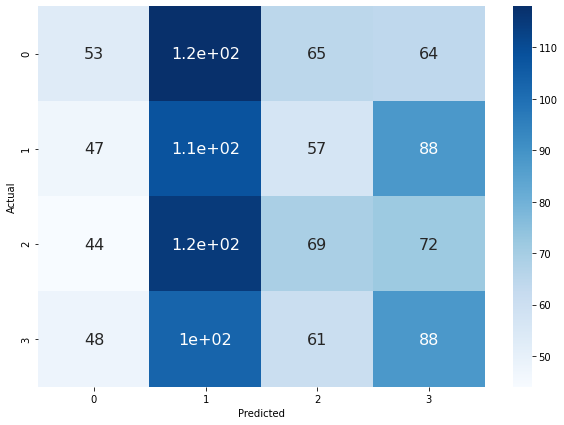

In [456]:
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size


### Part III: BERT Classifier

In [50]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from transformers import BertModel, BertTokenizer

In [51]:
tok = BertTokenizer.from_pretrained('bert-base-uncased')

In [52]:
class BERTDataset(Dataset):

    def __init__(self, dataset):
        """Has information on the abstracts and labels"""
        self.tok = BertTokenizer.from_pretrained('bert-base-uncased')
        self.abstracts = [self.tok.encode(abstract,  truncation_strategy='longest_first', max_length=100) for abstract in dataset.cleaned]
        self.labels = dataset.label.tolist()

    def __len__(self):
        """Has information on the dataset size"""
        return len(self.abstracts)

    def __getitem__(self, idx):
        """Returns the data"""
        abstr = self.abstracts[idx]
        label = self.labels[idx]
        return abstr, label

In [53]:
def BERTCollate(batch):
    
    batch_size = len(batch)
    
    sents = [sent for sent, _ in batch]
    labels = torch.tensor([label for _, label in batch]).long()
    
    max_len = max(len(sent) for sent in sents)
    
    sents_pad = torch.zeros((batch_size, max_len)).long()
    masks_pad = torch.zeros((batch_size, max_len)).long()
    segs_pad = torch.zeros((batch_size, max_len)).long()
    
    for i, sent in enumerate(sents):
        sents_pad[i, :len(sent)] = torch.tensor(sent)
        masks_pad[i, :len(sent)] = 1
    
    return sents_pad, masks_pad, segs_pad, labels

In [ ]:
dataset = BERTDataset()

In [66]:
abstracts = [tok.encode(sent) for sent in train['cleaned']]

In [71]:
labels = list(train['label'])

In [73]:
dataset = SumDataset(abstracts, labels)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [76]:
loader = DataLoader(dataset, batch_size=2, collate_fn=collate, shuffle=True)

In [78]:
for i, b in enumerate(loader):
    print('Batch', i+1)
    sents, masks, segs, labels = b
    print('Sentences:', sents)
    print('Attention masks:', masks)
    print('Segment tokens:', segs)
    print('Labels:', labels)
    break
    # print(print(tok.convert_ids_to_tokens(sents[0])))

Batch 1
Sentences: tensor([[  101,   101,  1999,  2023,  3259,  2057,  2224, 11919, 28175,  2000,
         15796, 25269,   100,  2422, 10543,  1998,  6611,  1996,  4118,  2000,
           100,  2951,  1997, 25269,   100,  1999,  1996, 17201,  1997,   100,
          2057, 12826,  2256,  4118,  2000,  1996,  3115,  4118,  1997, 26899,
         22511,  1998,  2424,  2008,  1996,  4118,  1997, 11919, 28175,   100,
          8990,  2035, 13060,  3896,  1998,  2515,  2061,  2007,  6022,  8491,
         11709,  2084,  1996, 26899,  6028,  2582,  2005,   100,  3340,  1996,
         11709,  1999,  1996,  4906,  2024,  2035,  3558,  2256,  2817,  2036,
          7657,  1037,  2193,  1997,  3176,   100,  1999,  2023,  2951,  2025,
          2179,  3130,  2057,  2424,  2603,   100,  3340,  2756,   100,   102],
        [  101,   101,  2057,  2556,   100,  6971,  2090,  1996,   100, 21582,
          2126, 17201,  2492,  2732,  2313,  1998, 21375,   100, 12906,   100,
          2478,  1037,   100,  2

In [80]:
model = BertModel.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
class FormativeModel(nn.Module):

    def __init__(self):
        
        super(FormativeModel, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.linear = nn.Linear(768, 1)
        
    def forward(self, sents, masks, segs):
        
        output_bert = self.bert(abstracts, attention_mask=masks, token_type_ids=segs)[0].mean(axis=1)
        return self.linear(output_bert)

**A) What test accuracy does the BERT classifier achieve? How does this compare to the performance of the LSTM classifier?**

**B) Create a confusion matrix of the true versus predicted labels on the test set. What do you observe? How do the results relate to the expactations developed in Part I? How do they compare to the confusion matrix for the LSTM classifier?**

**C) Based on the confusion matrix (and taking into account the results from Part II), what conclusions can you draw about the speed with which astrophysics and computer science changed as scientific fields between 2010 and 2020?**

**D) Make predictions about possible advantages and disadvantages of using a model based on n-grams and smoothing (e.g., Naive Bayes) for this task, as opposed to neural models. Your discussion should touch upon the 
unigram and bigram statistics reported in Part I.**